# Results Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import visualization as vs
%load_ext autoreload
%autoreload 2

## Remarks

* Raw data pre-processing, remove all the users' records if total records are less than 200

* When we consider ego-alter pair, remove all the alters if they have less than 200 checkins before ego.

* All Cross Entropies who perform worse than a random algorithm ($log_2(N_{Ego-Unique}$) are considered “useless” and all others considered “helpful”. Thic can be verified by maximizing Fano’s inequality for $\Pi_{max}$.

# 1. No control, No fixed number of meetupers, the whole dataset

In [2]:
user_stats = pd.read_csv('results/user-meetup-all-None.csv')

### 1.1 Entropies

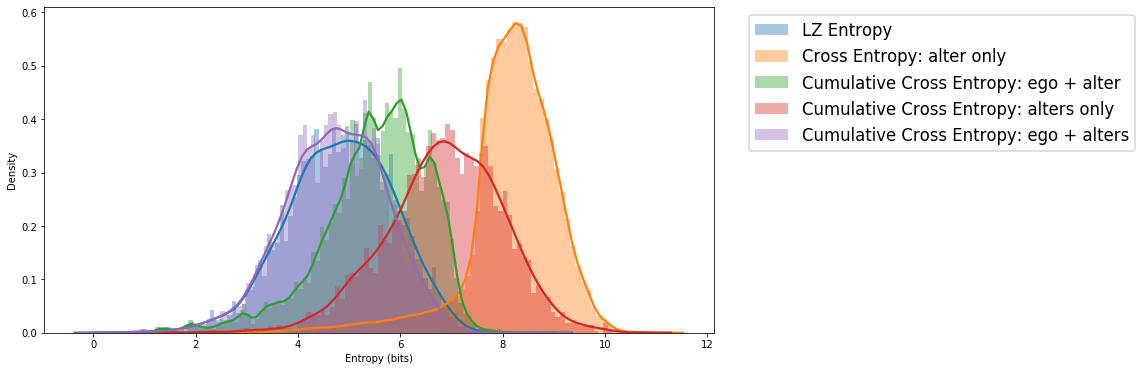

In [3]:
vs.hist_entropy(user_stats[user_stats['group']=='helpful'])

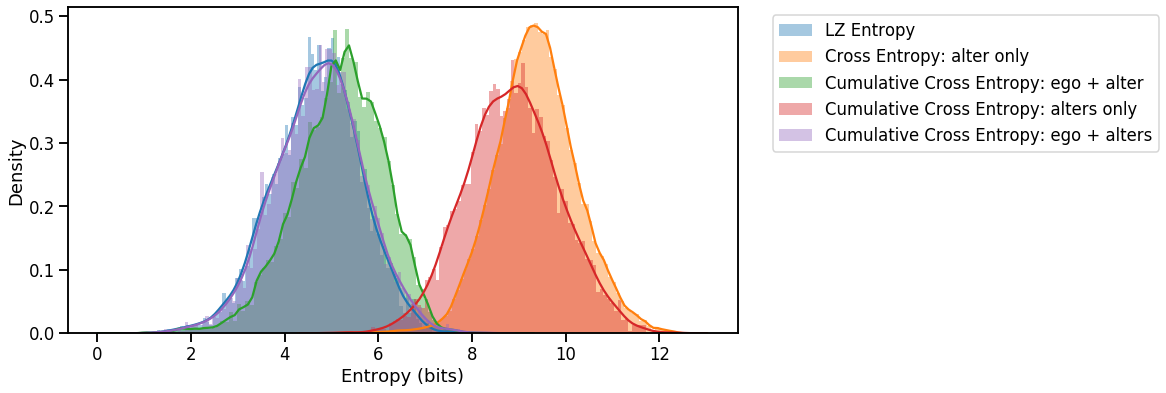

In [4]:
vs.hist_entropy(user_stats[user_stats['group']=='useless'])

### 1.2 Predictability

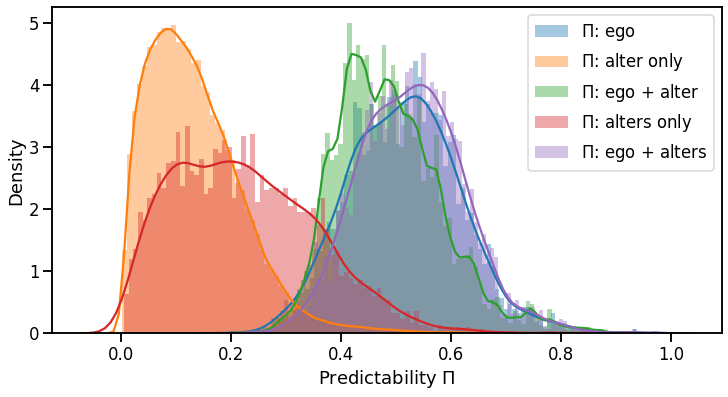

In [5]:
vs.hist_pred(user_stats[user_stats['group']=='helpful'])

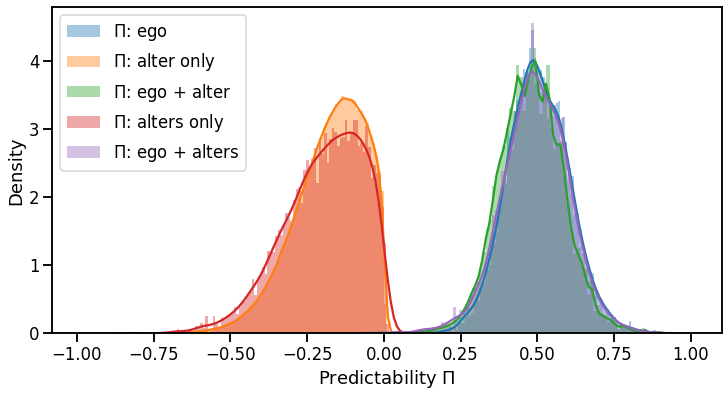

In [6]:
vs.hist_pred(user_stats[user_stats['group']=='useless'])

### 1.3 Paper Plot-- entropy vs predictability

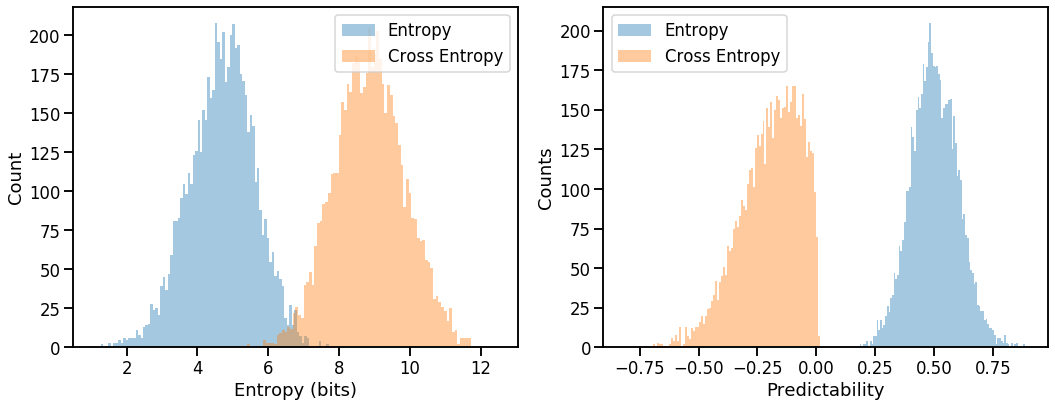

In [7]:
vs.paper_hist(user_stats[user_stats['group']=='useless'])

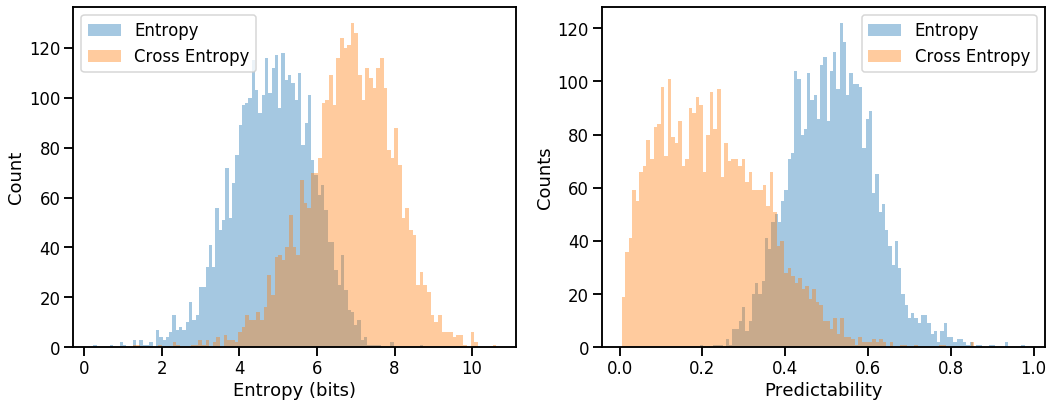

In [8]:
vs.paper_hist(user_stats[user_stats['group']=='helpful'])

### 1.4 Paper Interaction from ego aspect and alter aspect

#### 1.4.1 ego interaction

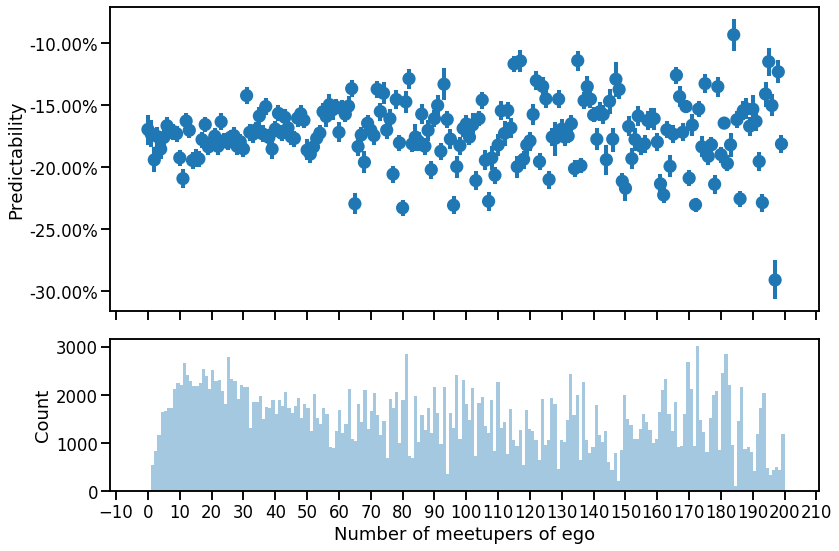

In [9]:
vs.paper_interaction(user_stats[user_stats['group']=='useless'], threshold=200, aspect='ego')

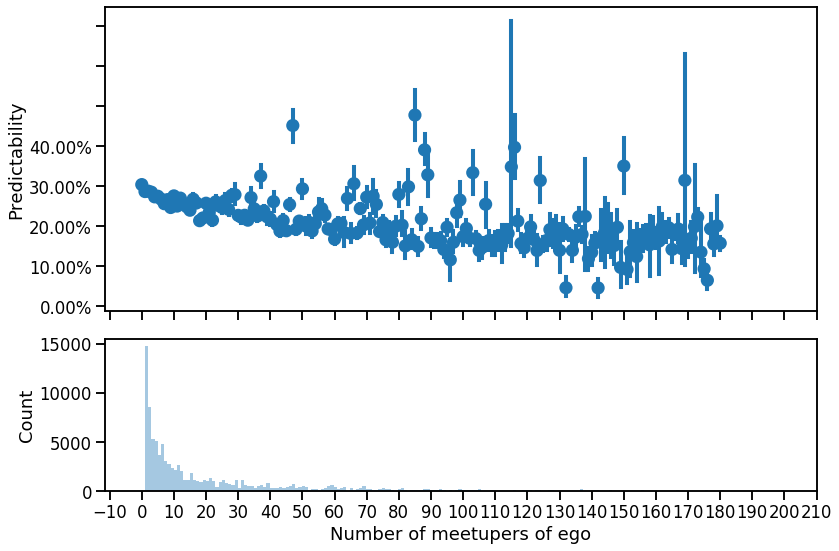

In [10]:
vs.paper_interaction(user_stats[user_stats['group']=='helpful'], threshold=200, aspect='ego')

From the view of ego, we can draw any volid conclusion.

#### 1.4.2 alter interaction

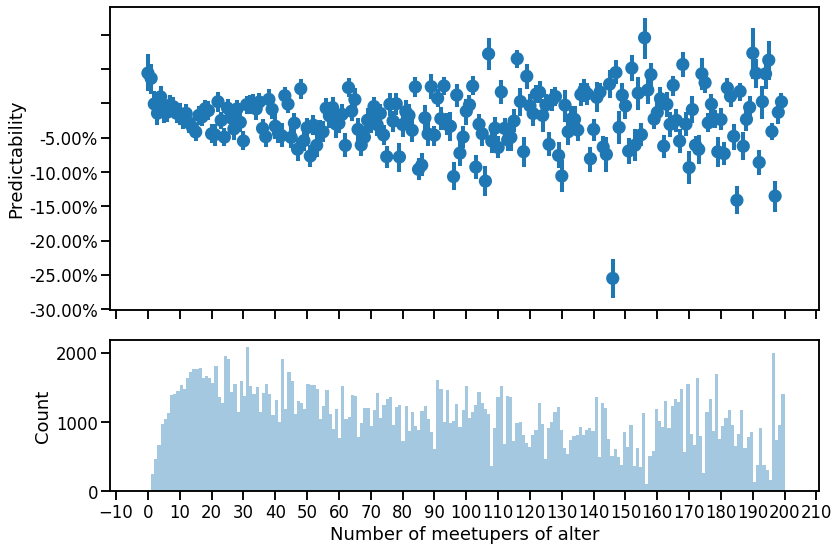

In [11]:
vs.paper_interaction(user_stats[user_stats['group']=='useless'], threshold=200, aspect='alter')

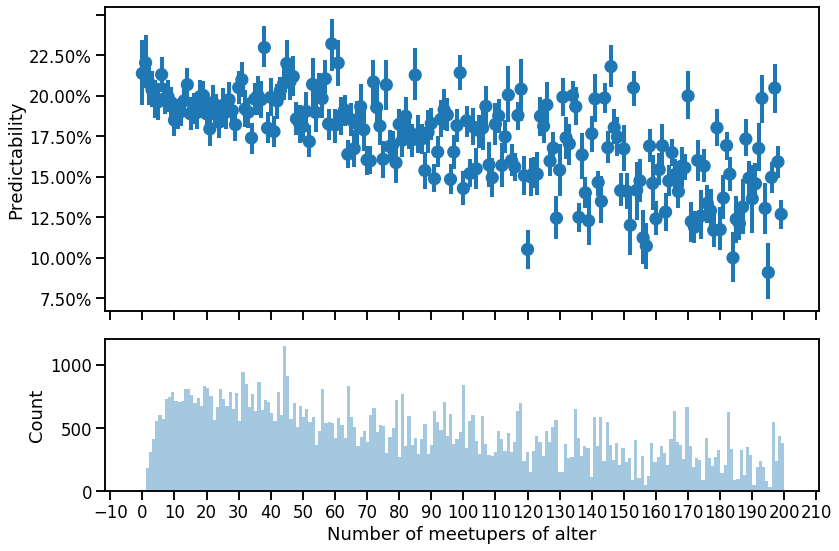

In [12]:
vs.paper_interaction(user_stats[user_stats['group']=='helpful'], threshold=200, aspect='alter')

*From the view of alter, given "helpful" group, we can see a general decreasing trend along with the increase of the number of meetupers of alter.*

### 1.5 Number of alters added vs entropy and predictability

#### 1.5.1 entropy

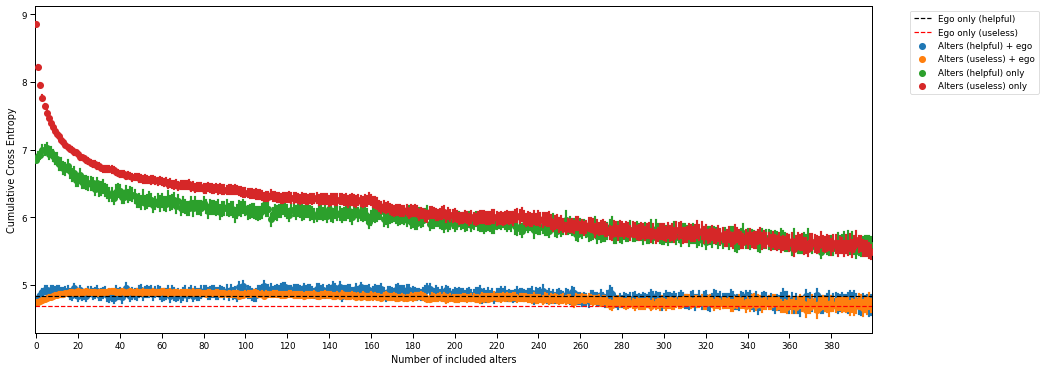

In [24]:
vs.num_point_plot(user_stats, threshold=400, name='entropy', mode='paper', partition=True)

#### 1.5.2 predictability

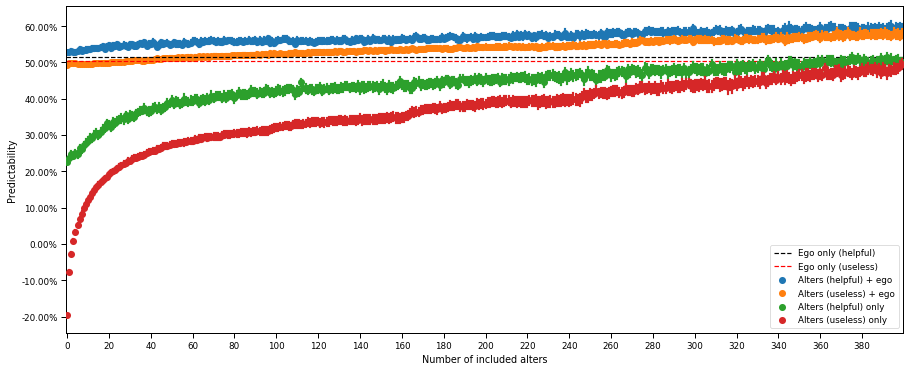

In [25]:
vs.num_point_plot(user_stats, threshold=400, name='predictability', mode='paper', partition=True)

*Generally speaking, the group "helpful" does better than group "useless"!*

# 2. Fixed the number of meetupers, n_meetupers = 100

In [ ]:
meetupers = user_stats.groupby('userid_x').size().reset_index(name='n_meetupers')
user_stats = user_stats.merge(meetupers, how='left', on='userid_x')

In [12]:
user_stats_part = user_stats[user_stats['n_meetupers'] == 100]

In [14]:
len(set(user_stats_part['userid_x'].tolist()))

20

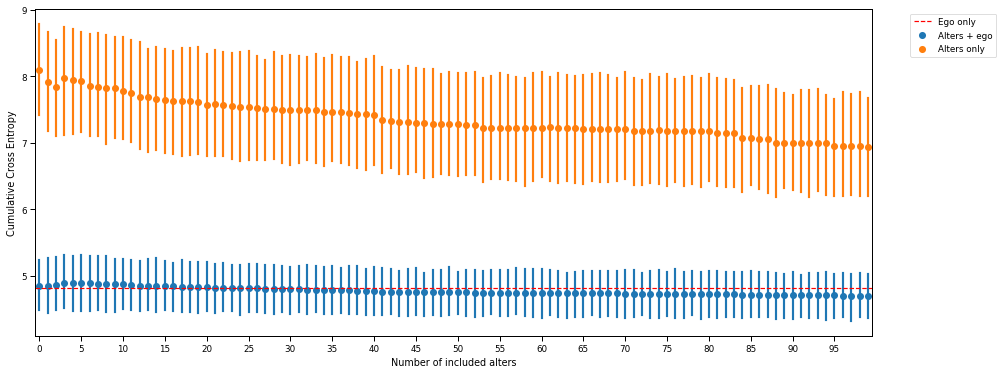

In [26]:
vs.num_point_plot(user_stats_part, name='entropy', mode='paper', partition=False)

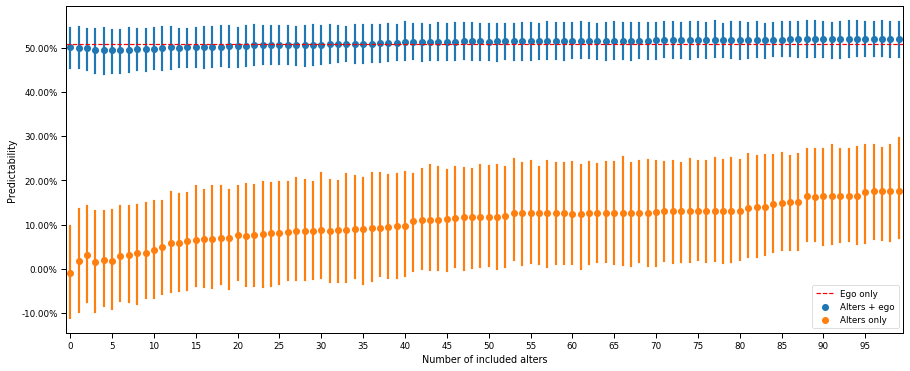

In [27]:
vs.num_point_plot(user_stats_part, name='predictability', mode='paper', partition=False)

# 3. Focus on ego-alter pairs with 1 meetup

In [18]:
user_stats_one =  user_stats[user_stats['meetup'] == 1]

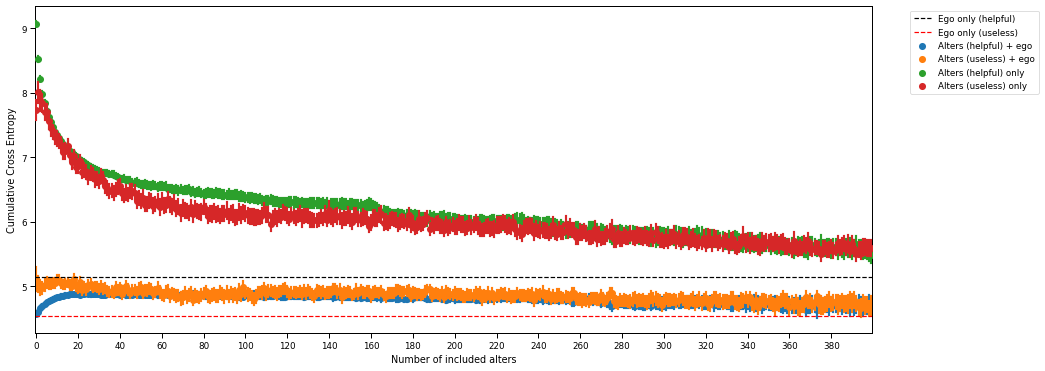

In [30]:
vs.num_point_plot(user_stats_one, name='entropy', mode='paper', threshold=400, partition=True)

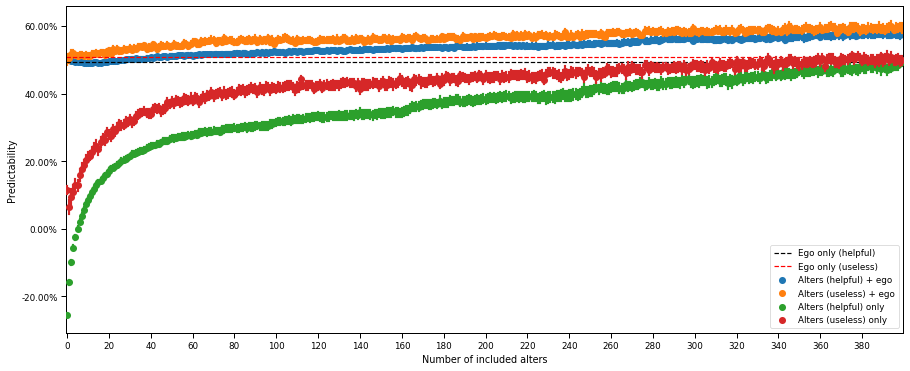

In [31]:
vs.num_point_plot(user_stats_one, name='predictability', mode='paper', threshold=400, partition=True)

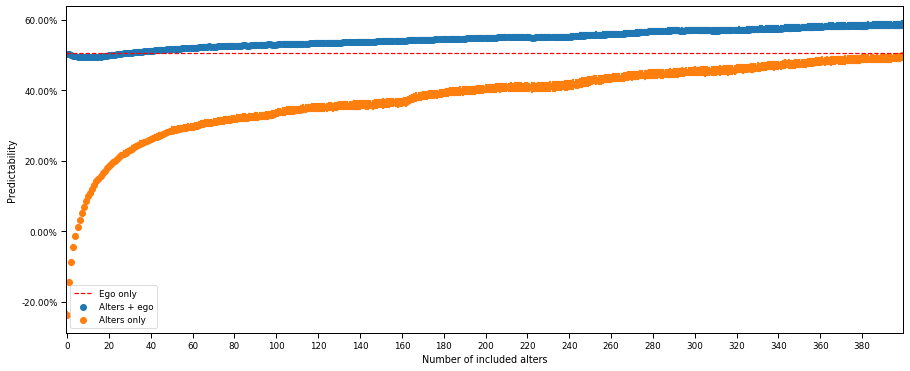

In [32]:
vs.num_point_plot(user_stats_one, name='predictability', mode='paper', threshold=400, partition=False)

# 4. Focus on ego-alter pairs with 2 or more meetup

In [33]:
user_stats_two =  user_stats[user_stats['meetup'] > 1]

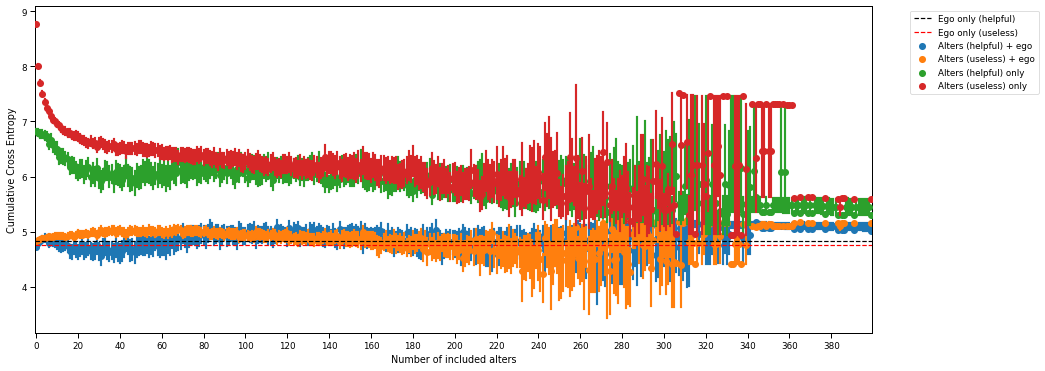

In [34]:
vs.num_point_plot(user_stats_two, name='entropy', mode='paper', threshold=400, partition=True)

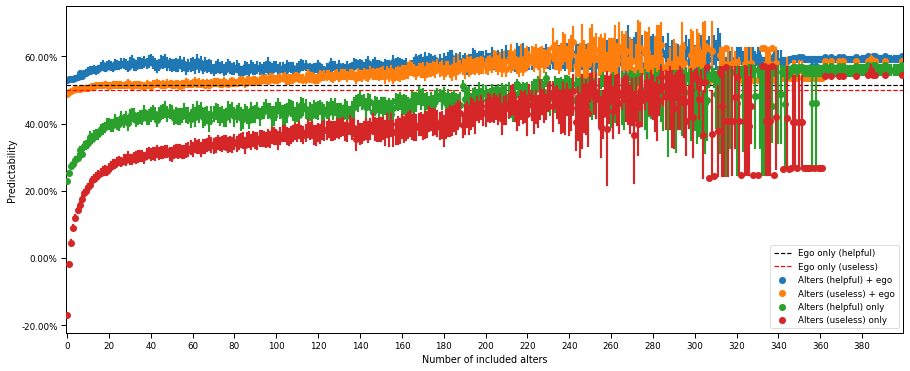

In [35]:
vs.num_point_plot(user_stats_two, name='predictability', mode='paper', threshold=400, partition=True)

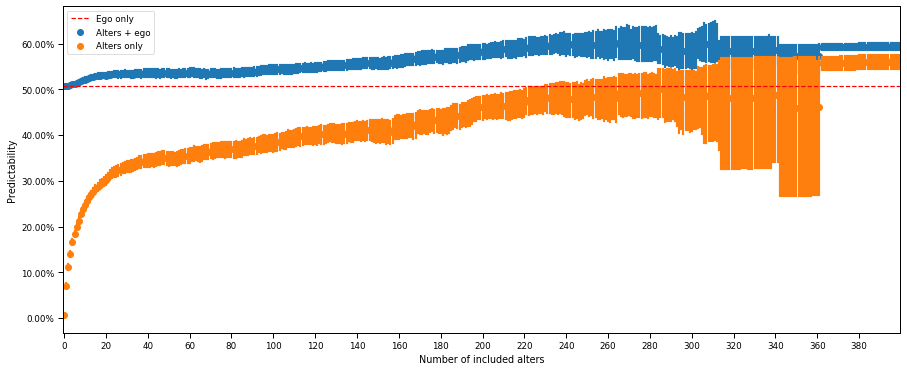

In [36]:
vs.num_point_plot(user_stats_two, name='predictability', mode='paper', threshold=400, partition=False)